In [1]:
# https://python-graph-gallery.com/web-highlighted-lineplot-with-faceting/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from common import read_workout_dfs, load_cabin_font, load_outfit_font

In [3]:
dfs = read_workout_dfs()

In [4]:
workout_types = [
    # "Bike",
    "Run",
    # "Swim",
    # "Strength"
]

df_months = []
for year, df in dfs.items():
    df = df[df["WorkoutType"].isin(workout_types)]
    df["month"] = df["WorkoutDay"].apply(lambda date: date.split("-")[1])
    df_month = df.groupby("month", as_index=False).agg({"TimeTotalInHours": "sum"})
    df_month["year"] = year
    df_months.append(df_month)

df_months = pd.concat(df_months)

/tmp/ipykernel_2250/1968475048.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df["WorkoutDay"].apply(lambda date: date.split("-")[1])
/tmp/ipykernel_2250/1968475048.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df["WorkoutDay"].apply(lambda date: date.split("-")[1])
/tmp/ipykernel_2250/1968475048.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [5]:
def fill_missing_months(df):
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    dfs_filled = []
    for year in df["year"].unique():
        df_year = df[df["year"] == year]
        for month in months:
            if month not in df_year["month"].values:
                df_month = pd.DataFrame({"month": [month], "TimeTotalInHours": [0], "year": [year]})
                df_year = pd.concat([df_year, df_month])
        dfs_filled.append(df_year)
    return pd.concat(dfs_filled).sort_values(["year", "month"])

df_months = fill_missing_months(df_months)
df_months.head()

,month,TimeTotalInHours,year
0,01,0.0,2021
0,02,0.0,2021
0,03,0.0,2021
0,04,0.0,2021
0,05,0.0,2021


In [6]:
years = df_months["year"].unique()
year_to_color = {
    2021: "#f08c44", 
    2022: "#008000",
    2023: "#9d00ff",
    2024: "#386494"
}
month_names = {
    "01": "Jan",
    "02": "Feb",    
    "03": "Mar",
    "04": "Apr",    
    "05": "May",
    "06": "Jun",    
    "07": "Jul",
    "08": "Aug",    
    "09": "Sep",
    "10": "Oct",    
    "11": "Nov",
    "12": "Dec"
}

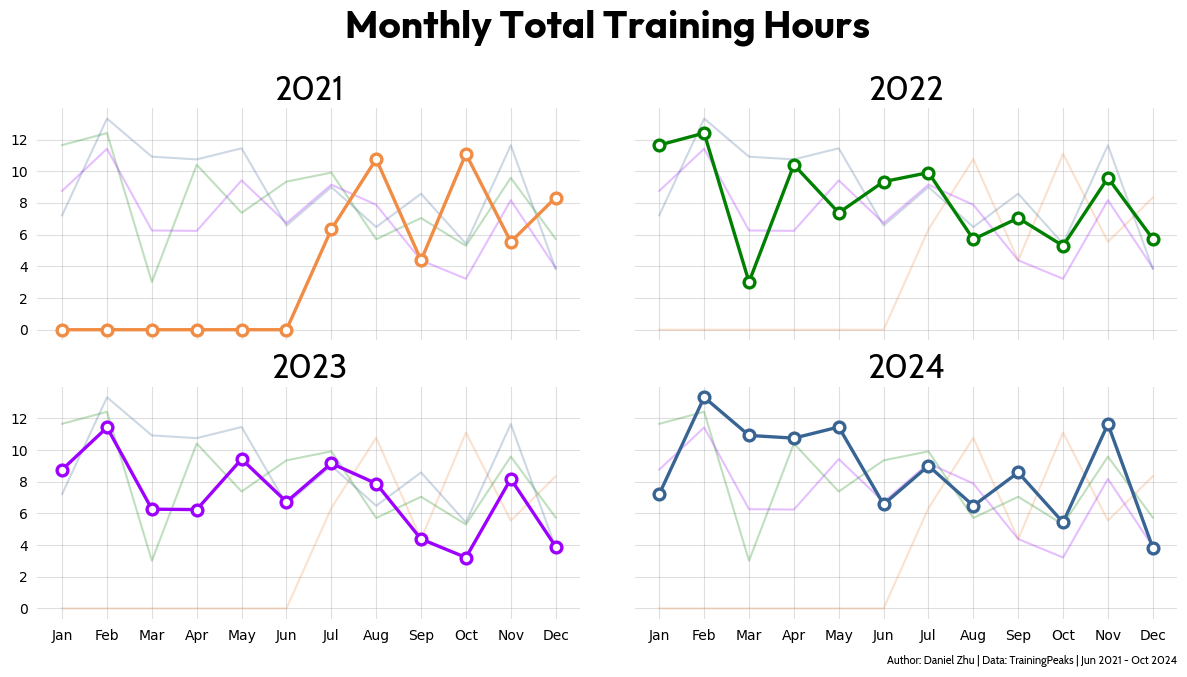

In [7]:
cabin_font = load_cabin_font()
cabin_font.set_weight(500)
cabin_font.set_size(24)

outfit_font = load_outfit_font()

def plot_year(year_hl, df_months, ax):
    for year in years:
        df_year = df_months[df_months["year"] == year]
        x = df_year["month"].to_list()
        y = df_year["TimeTotalInHours"].to_list()

        if year == year_hl:
            ax.plot(x, y, color=year_to_color[year], lw=2.4, zorder=10)
            ax.scatter(x, y, fc="w", color=year_to_color[year], s=60, lw=2.4, zorder=12)
        else:
            ax.plot(x, y, color=year_to_color[year], lw=1.5, alpha=0.25)

    ax.tick_params(bottom=False, left=False)
    ax.set_xticks(x, month_names.values())
    ax.set_frame_on(False)
    ax.grid(which="minor", lw=0.4, alpha=0.4)
    ax.grid(which="major", lw=0.8, alpha=0.4)
    ax.set_title(year_hl, fontproperties=cabin_font)


fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 7))
for idx, (ax, year) in enumerate(zip(axes.ravel(), years)):
    plot_year(year, df_months, ax)

fig.subplots_adjust(wspace=0.1, left=0.025, right=0.975, bottom=0.09, top=0.82)
fig.suptitle("Monthly Total Training Hours", fontsize=28, fontproperties=outfit_font, y=0.96)
fig.text(
    x=0.975, 
    y=0.03, 
    s="Author: Daniel Zhu | Data: TrainingPeaks | Jun 2021 - Oct 2024", 
    ha="right", 
    va="center", 
    fontsize=8, 
    fontproperties=cabin_font
)
plt.savefig('../figures/multi_lineplot.png', dpi=1000, bbox_inches='tight')
plt.show()